# Project 4: Web Scraping Indeed.com & Predicting Salaries

In Project 4, we practice two major skills: collecting data via  web scraping and building a binary predictor with Logistic Regression.

We will collect salary information on data science jobs in a variety of markets. Using location, title, and job summary, we'll predict the salary of the job. For job posting sites, this is extraordinarily useful. While most listings DO NOT come with salary information (as you will see in this exercise), extrapolating expected salary can help guide negotiations.

Normally, we can use regression for this task; however, we will convert this problem into classification and use Logistic Regression.

- Q: Why would we want this to be a classification problem?
- A: While more precision may be better, there is a fair amount of natural variance in job salaries - predicting a range be may be useful.

Section one focuses on scraping Indeed.com; then we use listings with salary information to build a model and predict additional salaries.

### Scraping job listings from Indeed.com

Scrape job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries. First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10")

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract.

#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)

The URL here has many query parameters

- `q` for the job search
- This is followed by "+20,000" to return results with salaries (or expected salaries >$20,000)
- `l` for a location 
- `start` for what result number to start on

In [4]:
URL = "http://www.indeed.com/jobs?q=data+scientist+&l=Atlanta%2C+GA"

In [5]:
import requests
import bs4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup

In [9]:
# DL. You forgot yo remove the # from the line where you defined your "soup" and "r" variables. 
# Try running your notebook next time just to make sure.

# # read site in soup
r = requests.get("http://www.indeed.com/jobs?q=data+scientist+&l=Atlanta%2C+GA")
soup = BeautifulSoup(r.content, "lxml")

# # Append to the full set of results
# results = soup.findAll('div', { "class" : "result" })
# results
data = soup.find_all("div", {"class" : "results" })
url = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={}&start={}"
cities = ["dallas", "philadelphia", "atlanta", "chicago", "los+angeles", "seattle", "boston","new+york"]
df = pd.DataFrame()

Let's look at one result more closely. A single `result` looks like

```
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&amp;campaignid=serp-linkcompanyname&amp;fromjk=2480d203f7e97210&amp;jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some of the more verbose elements removed, we can see that there is some structure to the above:
- The salary is available in a `nobr` element inside of a `td` element with `class='snip`.
- The title of a job is in a link with class set to `jobtitle` and a `data-tn-element="jobTitle`.  
- The location is set in a `span` with `class='location'`. 
- The company is set in a `span` with `class='company'`. 

### Write 4 functions to extract each item: location, company, job, and salary.

example: 
```python
def extract_location_from_result(result):
    return result.find ...
```

- Make sure these functions are robust and can handle cases where the data/field may not be available
- Test the functions on the results above

In [10]:
# get text
def extract_text(el):
    if el:
        return el.text.strip()
    else:
        return ''
        
# company
def get_company_from_result(result):
    return extract_text(result.find('span', {'class' : 'company'}))

# location
def get_location_from_result(result):
    return extract_text(result.find('span', {'class' : 'location'}))

# summary
def get_summary_from_result(result):
    return extract_text(result.find('span', {'class' : 'summary'}))

# title
def get_title_from_result(result):
    return extract_text(result.find('a', {'data-tn-element' : 'jobTitle'}))

# get salary if exists
def get_salary_from_result(result):
    salary_table = result.find('td', {'class' : 'snip'})
    if salary_table:
        snip = salary_table.find('nobr')
        if snip:
            return snip.text.strip()   
    return None

Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results: the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try different city). The second controls where in the results to start and gives 10 results (so we can keep incrementing this by 10 to move further within the list).

#### Complete the following code to collect results from multiple cities and start points. 
- Enter your city below to add it to the search
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different

In [11]:
# specify city
#YOUR_CITY = 'Atlanta'

In [14]:
# # create template URL and max number of results (pages) to pull
# url_template = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l={}&start={}"

# # for loop to pull data with bs4
# for city in set():
#     for start in range(len(results)):
#         r = requests.get(url_template.format(city, start))
#         # Grab the results from the request (as above)
#         soup = BeautifulSoup(r.content)
#         # Append to the full set of results
#         results += soup.findAll('div', { "class" : "result" })
        
for city in cities:
    for i in range(0,1500,10):
        LINK = url.format(city, i)
        r = requests.get(LINK)
        soup = BeautifulSoup(r.content, "lxml")
        data += soup.find_all("div", {"class" : "result"})

KeyboardInterrupt: 

In [15]:
data

[<div class="row result" data-jk="f55ab6a85902650e" id="pj_f55ab6a85902650e">\n<a class="jobtitle turnstileLink" data-tn-element="jobTitle" href="/pagead/clk?mo=r&amp;ad=-6NYlbfkN0B5gYbF--56VF-R_fhSNOm7FnnXFXRD7KozXp8q5hzPbdz0UItAK7AVoHW1cWIDfQy89lE5jsUcAY6B9rwl_Ah742XywEmqkIg0vDgr4pKu-AgBBifpjSoSiFFxD8l5tBj4d5UUUXrsPPbXp34imhaw7ns1lPjwRMbhmTe8V7f6ogdqfLzo6qvwPeOMb6zl6vnHPuFhJlGEwFezLkJAfWMnCzAmCEQG973hB9b_Idou-5qjCqxolDxGwGatLgrDo1b_DveO8ZCvZSdxVEXz61Nz0atjnIwRH6xXRXDIWzo3yoSYmr7jVhjIiNl8w0ZvLwn-R6ovrka7NcFVP2ACxFZC4Pludfw1lFH_ZK17tkjc0Kg6_865uUBX5V9AgQv0WT0M6bho7XO-d6umK00Cz7AFuEncb37drxzKnjl4dUHMZuWghuAGs4GxgZwkKNGd9gJAgJrCkpjiPqz_Fs_GnbioTmbiVj18RTNqEuDM3k7hGq-ySBSZ3NNZGsvI2lyn1aQei5OZ40mKzSonVILc9US-lelX0mtcQdk=&amp;p=1&amp;sk=&amp;fvj=0" id="sja1" onclick="setRefineByCookie(['salest']); sjoc('sja1',0); convCtr('SJ', pingUrlsForGA)" onmousedown="sjomd('sja1'); clk('sja1');" rel="nofollow" target="_blank" title="Sr Scientist I - Development">Sr <b>Scientist</b> I - Development</a>\

#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

In [16]:
# # combine data into dictionaries
# rows = []
# for result in results:
#     if result:
#         row = {}

#for cat in range(len(data)):        
location = [get_location_from_result(x) for x in data] 
title = [get_title_from_result(x) for x in data]
company = [get_company_from_result(x) for x in data]
salary = [get_salary_from_result(x) for x in data]

#create dataframe

import pandas as pd

df = pd.DataFrame({"location":location, "title":title, "company": company, "salary": salary})

#location
df.tail()





company          location                     salary  \
9074  All-In Analytics        Dallas, TX  $80,000 - $100,000 a year   
9075           Verizon  Irving, TX 75038                       None   
9076       Daisy Brand       Garland, TX                       None   
9077    Resolvity, Inc        Dallas, TX                       None   
9078        Alcon Labs    Fort Worth, TX                       None   

                                        title  
9074          Senior Marketing Data Scientist  
9075  Principal Data Scientist - Supply Chain  
9076                       Research Scientist  
9077      Data Scientist - Speech Recognition  
9078             Sr Scientist I - Development

In [17]:
df.head()

company        location       salary  \
0              Alcon Labs  Fort Worth, TX         None   
1          Resolvity, Inc      Dallas, TX         None   
2               Accenture      Dallas, TX         None   
3  eTek IT Services, Inc.      Dallas, TX  $67 an hour   
4                Cinemark       Plano, TX         None   

                                   title  
0           Sr Scientist I - Development  
1    Data Scientist - Speech Recognition  
2  Wireless Network Analytics Consultant  
3                      Big Data Engineer  
4          Senior Data Scientist Analyst

Lastly, we need to clean up salary data. 

1. Only a small number of the scraped results have salary information - only these will be used for modeling.
1. Some of the salaries are not yearly but hourly or weekly, these will not be useful to us for now
1. Some of the entries may be duplicated
1. The salaries are given as text and usually with ranges.

#### Find the entries with annual salary entries, by filtering the entries without salaries or salaries that are not yearly (filter those that refer to hour or week). Also, remove duplicate entries

In [18]:
# Filter to only the rows that have salary entries
df = df.dropna()
# Remove duplicates

df.drop_duplicates(["company","location","salary","title"], keep="last", inplace = True)
# Filter out salary entries referring to week, hour or month
df = df[~(df.salary.astype('str').str.contains('hr'))] # example
df = df[~(df.salary.astype('str').str.contains('an hour'))] # example
df = df[~(df.salary.astype('str').str.contains('a day'))] # example
df = df[~(df.salary.astype('str').str.contains('a week'))] # example
df = df[~(df.salary.astype('str').str.contains('a month'))] # example


df.head()

company          location  \
186                         Selby Jennings        Dallas, TX   
2273                              Audigent  Philadelphia, PA   
2275  Public Health Management Corporation  Philadelphia, PA   
2287                  Wolfe & Huntsman LLC  Philadelphia, PA   
2289                   The Big Game Hunter   Bala-Cynwyd, PA   

                          salary  \
186    $75,000 - $120,000 a year   
2273   $90,000 - $120,000 a year   
2275              $70,000 a year   
2287             $155,000 a year   
2289  $100,000 - $150,000 a year   

                                                  title  
186             Catastrophe Risk Analyst - Quantitative  
2273                         Senior Full-Stack Engineer  
2275   Research Scientist - Research & Evaluation Group  
2287  Senior Business Systems Architect (Hadoop Deve...  
2289       Quantitative Research Analyst Bala Cynwyd PA

In [19]:
df.shape

(68, 4)

#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary

In [20]:
import re
import numpy as np

# DL. I like this function. Good practice!
def extract_salary_average(salary_string):
    regex = r'\$([0-9]+,[0-9]+)'
    matches = re.findall(regex, salary_string)
    return np.mean([float(salary.replace(',', '')) for salary in matches ])

In [21]:
df.count()

company     68
location    68
salary      68
title       68
dtype: int64

In [22]:
# use '.map' to transform salary to new feature
df["salary"] = map(extract_salary_average, df["salary"])

In [23]:
df.count()

company     68
location    68
salary      68
title       68
dtype: int64

In [ ]:
# #dropping a 2nd time to get rid of salary nan values
# df = df.dropna()
# df.count()

In [24]:
df.head()

company          location    salary  \
186                         Selby Jennings        Dallas, TX   97500.0   
2273                              Audigent  Philadelphia, PA  105000.0   
2275  Public Health Management Corporation  Philadelphia, PA   70000.0   
2287                  Wolfe & Huntsman LLC  Philadelphia, PA  155000.0   
2289                   The Big Game Hunter   Bala-Cynwyd, PA  125000.0   

                                                  title  
186             Catastrophe Risk Analyst - Quantitative  
2273                         Senior Full-Stack Engineer  
2275   Research Scientist - Research & Evaluation Group  
2287  Senior Business Systems Architect (Hadoop Deve...  
2289       Quantitative Research Analyst Bala Cynwyd PA

In [ ]:
# save scraped results as a CSV for Tableau/external viz
# df.to_csv('inSalary.csv', encoding="utf-8")


## Predicting salaries using Logistic Regression

In [25]:
# load in the the data of scraped salaries
dfSalary = pd.read_csv("inSalary.csv")
dfSalary.head()

Unnamed: 0                        company          location   salary  \
0          21  University of Texas at Dallas    Richardson, TX  48000.0   
1          93               All-In Analytics        Dallas, TX  90000.0   
2         113            NextStep Recruiting  Irving, TX 75063  85000.0   
3         174                 Selby Jennings        Dallas, TX  97500.0   
4        1726          Boy Scouts of America  Irving, TX 75038  50000.0   

                                     title  
0                       Research Scientist  
1          Senior Marketing Data Scientist  
2         Pricing and Quantitative Analyst  
3  Catastrophe Risk Analyst - Quantitative  
4      Senior Statistical Data Coordinator

In [26]:
del dfSalary["Unnamed: 0"]

In [27]:
dfSalary.tail()

company                           location    salary  \
228       Selby Jennings  New York, NY 10167 (Midtown area)  110000.0   
229  Analytic Recruiting  New York, NY 10017 (Midtown area)  140000.0   
230       Selby Jennings  New York, NY 10167 (Midtown area)  237500.0   
231         Wade & Wendy                       New York, NY  100000.0   
232        Laguna Source  New York, NY 10001 (Chelsea area)  124500.0   

                                                 title  
228                           AVP Quantitative Analyst  
229   Director of Data Science and Predictive Modeling  
230              VP C++ Low Latency Software Developer  
231               Wade & Wendy_Data Scientist/Engineer  
232  Sr Process Scientist, Biologics Downstream Pur...

In [28]:
#split city and state into different columns
#def splitLocation(cityState):
# DL. Nice!    
dfSalary["city"] = dfSalary.location.apply(lambda x: x.split(',')[0])
dfSalary['state'] = dfSalary.location.apply(lambda x: x.split(', ')[1].split(" ")[0])
dfSalary.tail()

company                           location    salary  \
228       Selby Jennings  New York, NY 10167 (Midtown area)  110000.0   
229  Analytic Recruiting  New York, NY 10017 (Midtown area)  140000.0   
230       Selby Jennings  New York, NY 10167 (Midtown area)  237500.0   
231         Wade & Wendy                       New York, NY  100000.0   
232        Laguna Source  New York, NY 10001 (Chelsea area)  124500.0   

                                                 title      city state  
228                           AVP Quantitative Analyst  New York    NY  
229   Director of Data Science and Predictive Modeling  New York    NY  
230              VP C++ Low Latency Software Developer  New York    NY  
231               Wade & Wendy_Data Scientist/Engineer  New York    NY  
232  Sr Process Scientist, Biologics Downstream Pur...  New York    NY

#### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median)

In [29]:
# calculate median and create feature with 1 as high salary
medSal = np.median(dfSalary.salary)
dfSalary["highSal"] = [1 if x > medSal else 0 for x in dfSalary["salary"]]
dfSalary.head()


company          location   salary  \
0  University of Texas at Dallas    Richardson, TX  48000.0   
1               All-In Analytics        Dallas, TX  90000.0   
2            NextStep Recruiting  Irving, TX 75063  85000.0   
3                 Selby Jennings        Dallas, TX  97500.0   
4          Boy Scouts of America  Irving, TX 75038  50000.0   

                                     title        city state  highSal  
0                       Research Scientist  Richardson    TX        0  
1          Senior Marketing Data Scientist      Dallas    TX        0  
2         Pricing and Quantitative Analyst      Irving    TX        0  
3  Catastrophe Risk Analyst - Quantitative      Dallas    TX        0  
4      Senior Statistical Data Coordinator      Irving    TX        0

In [30]:
medSal

100000.0

### Q: What is the baseline accuracy for this model?

It is 50% if we guess randomly, half the salaries will be below the median and half will be above.

#### Create a Logistic Regression model to predict High/Low salary using statsmodel. Start by ONLY using the location as a feature. Display the coefficients and write a short summary of what they mean.

In [33]:
# create statsmodel and summary
import statsmodels.formula.api as sm
import patsy

In [35]:
# DL. For this model, you might want to use only thr "city" variable as a feature to avoid multicollinearity.
# City and State might be rally correlated to one another. 
# Also, you might want to make the Cities dummy variables.
# It's usually helpful to interpret your results after deriving them. 

y,X=patsy.dmatrices('highSal ~ C(state) + C(city)',data=dfSalary)

model = sm.Logit(y, X).fit(method = "ncg")

model.summary()

Optimization terminated successfully.
         Current function value: 0.494253
         Iterations: 17
         Function evaluations: 18
         Gradient evaluations: 34
         Hessian evaluations: 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                highSal   No. Observations:                  233
Model:                          Logit   Df Residuals:                      191
Method:                           MLE   Df Model:                           41
Date:                Tue, 22 Nov 2016   Pseudo R-squ.:                  0.2869
Time:                        14:50:55   Log-Likelihood:                -115.16
converged:                       True   LL-Null:                       -161.48
                                        LLR p-value:                 7.231e-06
===============================================================================================
                                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
Intercept                      -6.6189        nan        nan        nan           nan       nan
C(state)[T.DE]                  6.0754        nan        nan        nan           nan       nan
C(state)[T.GA]                 -5.0338        nan        nan        nan           nan       nan
C(state)[T.IL]                 -1.4084        nan        nan        nan           nan       nan
C(state)[T.MA]                  5.8321        nan        nan        nan           nan       nan
C(state)[T.NJ]                 -7.1644        nan        nan        nan           nan       nan
C(state)[T.NY]                 -3.1064    9.7e+06   -3.2e-07      1.000      -1.9e+07   1.9e+07
C(state)[T.PA]                  5.0100   3.61e+07   1.39e-07      1.000     -7.07e+07  7.07e+07
C(state)[T.TX]                 -1.9018   1.43e+08  -1.33e-08      1.000      -2.8e+08   2.8e+08
C(state)[T.WA]                  1.9312        nan        nan        nan           nan       nan
C(city)[T.Atlanta]             10.7364    339.123      0.032      0.975      -653.933   675.406
C(city)[T.Bala-Cynwyd]         13.6329   3.54e+07   3.86e-07      1.000     -6.93e+07  6.93e+07
C(city)[T.Bedford]            -11.1321        nan        nan        nan           nan       nan
C(city)[T.Bellevue]             4.6877        nan        nan        nan           nan       nan
C(city)[T.Boston]               1.3622        nan        nan        nan           nan       nan
C(city)[T.Burbank]             18.3923        nan        nan        nan           nan       nan
C(city)[T.Cambridge]           15.0004        nan        nan        nan           nan       nan
C(city)[T.Chatsworth]          -6.1130        nan        nan        nan           nan       nan
C(city)[T.Chicago]              8.6151        nan        nan        nan           nan       nan
C(city)[T.Culver City]         -6.1130        nan        nan        nan           nan       nan
C(city)[T.Cypress]             -6.1130        nan        nan        nan           nan       nan
C(city)[T.Dallas]               7.8276   1.42e+08   5.51e-08      1.000     -2.79e+08  2.79e+08
C(city)[T.Evanston]            -5.0117        nan        nan        nan           nan       nan
C(city)[T.Framingham]          13.2087        nan        nan        nan           nan       nan
C(city)[T.Gibbstown]           -1.0235        nan        nan        nan           nan       nan
C(city)[T.Glenview]            -5.0117        nan        nan        nan           nan       nan
C(city)[T.Hoboken]             -1.0235        nan        nan        nan           nan       nan
C(city)[T.Irving]              -5.2084   1.42e+08  -3.66e-08      1.000     -2.79e+08  2.79e+08
C(city)[T.Kenilworth]          -1.0235        nan        nan        nan           nan       nan
C(city)[T.Long Island City]    -3.7175   1.18e+07  -3.15e-07      1.000     -2.31e+07  2.31e+07
C(city)[T.Los Angeles]          6.0128        nan        nan        nan  

In [36]:
# Burbank, Cambridge, Wilmington

#### Create a few new variables in your dataframe to represent interesting features of a job title.
- For example, create a feature that represents whether 'Senior' or 'Manager' is in the title 
- Then build a new Logistic Regression model with these features. Do they add any value? 


In [39]:
# create senior, director, and manager dummies
# DL. Nice!
dfSalary2 = dfSalary
dfSalary2['is_senior'] = dfSalary2['title'].str.contains('Senior').astype(int) # example
dfSalary2['is_manager'] = dfSalary2['title'].str.contains('Manager').astype(int) # example
dfSalary2['is_lead'] = dfSalary2['title'].str.contains('Lead').astype(int) # example
dfSalary2['is_junior'] = dfSalary2['title'].str.contains('Junior').astype(int) # example

In [40]:
dfSalary.head()

company          location   salary  \
0  University of Texas at Dallas    Richardson, TX  48000.0   
1               All-In Analytics        Dallas, TX  90000.0   
2            NextStep Recruiting  Irving, TX 75063  85000.0   
3                 Selby Jennings        Dallas, TX  97500.0   
4          Boy Scouts of America  Irving, TX 75038  50000.0   

                                     title        city state  highSal  \
0                       Research Scientist  Richardson    TX        0   
1          Senior Marketing Data Scientist      Dallas    TX        0   
2         Pricing and Quantitative Analyst      Irving    TX        0   
3  Catastrophe Risk Analyst - Quantitative      Dallas    TX        0   
4      Senior Statistical Data Coordinator      Irving    TX        0   

   is_senior  is_manager  is_lead  is_junior  
0          0           0        0          0  
1          1           0        0          0  
2          0           0        0          0  
3          0           0        0          0  
4          1           0        0          0

In [41]:
# DL. Again, you might want to select either City or state amd also make them dummy variables.
y,X=patsy.dmatrices('highSal ~ C(state) + C(city) + is_senior + is_manager + is_lead + is_junior',data=dfSalary)

model = sm.Logit(y, X).fit(method = "ncg")

model.summary()

Optimization terminated successfully.
         Current function value: 0.468059
         Iterations: 18
         Function evaluations: 24
         Gradient evaluations: 41
         Hessian evaluations: 18


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                highSal   No. Observations:                  233
Model:                          Logit   Df Residuals:                      188
Method:                           MLE   Df Model:                           44
Date:                Tue, 22 Nov 2016   Pseudo R-squ.:                  0.3247
Time:                        14:54:49   Log-Likelihood:                -109.06
converged:                       True   LL-Null:                       -161.48
                                        LLR p-value:                 7.042e-07
===============================================================================================
                                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
Intercept                      -6.1836   5.58e+06  -1.11e-06      1.000     -1.09e+07  1.09e+07
C(state)[T.DE]                  5.8022   5.67e+07   1.02e-07      1.000     -1.11e+08  1.11e+08
C(state)[T.GA]                 -0.0141    4.4e+07  -3.21e-10      1.000     -8.62e+07  8.62e+07
C(state)[T.IL]                 -2.3834        nan        nan        nan           nan       nan
C(state)[T.MA]                  5.1147   5.67e+07   9.01e-08      1.000     -1.11e+08  1.11e+08
C(state)[T.NJ]                 -7.6891        nan        nan        nan           nan       nan
C(state)[T.NY]                 -4.0952        nan        nan        nan           nan       nan
C(state)[T.PA]                  4.5993        nan        nan        nan           nan       nan
C(state)[T.TX]                 -2.8907        nan        nan        nan           nan       nan
C(state)[T.WA]                  1.5192        nan        nan        nan           nan       nan
C(city)[T.Atlanta]              5.0332   4.35e+07   1.16e-07      1.000     -8.53e+07  8.53e+07
C(city)[T.Bala-Cynwyd]         13.7721        nan        nan        nan           nan       nan
C(city)[T.Bedford]            -11.4011   5.89e+07  -1.94e-07      1.000     -1.15e+08  1.15e+08
C(city)[T.Bellevue]             4.5377        nan        nan        nan           nan       nan
C(city)[T.Boston]               1.4587   5.89e+07   2.48e-08      1.000     -1.15e+08  1.15e+08
C(city)[T.Burbank]             18.1063   5.58e+06   3.25e-06      1.000     -1.09e+07  1.09e+07
C(city)[T.Cambridge]           15.0007   5.89e+07   2.55e-07      1.000     -1.15e+08  1.15e+08
C(city)[T.Chatsworth]          -6.7109   5.58e+06   -1.2e-06      1.000     -1.09e+07  1.09e+07
C(city)[T.Chicago]              8.9909        nan        nan        nan           nan       nan
C(city)[T.Culver City]         -1.8308    4.4e+07  -4.16e-08      1.000     -8.62e+07  8.62e+07
C(city)[T.Cypress]             -6.7868   5.58e+06  -1.22e-06      1.000     -1.09e+07  1.09e+07
C(city)[T.Dallas]               7.5946        nan        nan        nan           nan       nan
C(city)[T.Evanston]            -4.6895        nan        nan        nan           nan       nan
C(city)[T.Framingham]          13.2090   5.89e+07   2.24e-07      1.000     -1.15e+08  1.15e+08
C(city)[T.Gibbstown]           -1.0984        nan        nan        nan           nan       nan
C(city)[T.Glenview]            -6.6848        nan        nan        nan           nan       nan
C(city)[T.Hoboken]             -1.0984        nan        nan        nan           nan       nan
C(city)[T.Irving]              -6.3014        nan        nan        nan           nan       nan
C(city)[T.Kenilworth]          -1.0984        nan        nan        nan           nan       nan
C(city)[T.Long Island City]    -5.2884        nan        nan        nan           nan       nan
C(city)[T.Los Angeles]          5.1901   5.58e+06    9.3e-07      1.000  

The Cities return higher coefficients generally. Higher coefficients show less significants in the model. Delaware and  Massachusets were not significant to the model.

#### Rebuild this model with scikit-learn.
- You can either create the dummy features manually or use the `dmatrix` function from `patsy`
- Remember to scale the feature variables as well!


In [42]:
# scale, (patsy optional), and fit
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report

from patsy import dmatrix

predictorsX = patsy.dmatrix('~state + is_senior + is_manager + is_lead + is_junior',data=dfSalary)
featuresY = dfSalary2.highSal

X_train, X_test, Y_train, Y_test = train_test_split(predictorsX, featuresY, test_size=0.33)

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

In [43]:
conmat = np.array(confusion_matrix(Y_test, Y_pred, labels=[1,0]))

confusion = pd.DataFrame(conmat, index=['over_100k', 'under_100k'],
                         columns=['predicted_over_100k','predicted_under_100k'])

print(confusion)

            predicted_over_100k  predicted_under_100k
over_100k                    18                    23
under_100k                   12                    24


In [ ]:
# TP = confusion.ix['over_100k', 'predicted_over_100k']
# FP = confusion.ix['under_100k', 'predicted_over_100k']
# TN = confusion.ix['under_100k', 'predicted_under_100k']
# FN = confusion.ix['over_100k', 'predicted_under_100k']

# print(zip(['True Positives','False Positives','True Negatives','False Negatives'],
#           [TP, FP, TN, FN]))

#### Use cross-validation in scikit-learn to evaluate the model above. 
- Evaluate the accuracy, AUC, precision and recall of the model. 
- Discuss the differences and explain when you want a high-recall or a high-precision model in this scenario.

In [44]:
from sklearn.cross_validation import cross_val_score  

In [45]:
#accuracy
accuracy_score(Y_test, Y_pred, normalize=True, sample_weight=None)

0.54545454545454541

In [46]:
#precision
precision_score(Y_test, Y_pred)

0.59999999999999998

In [47]:
#recall
recall_score(Y_test, Y_pred)

0.43902439024390244

In [48]:
# DL. I think that if you reduce the number of features in you model, you might get a higher f1-score.
# I think the probelem might be that the model is overfitted.
print classification_report(Y_test, Y_pred)

             precision    recall  f1-score   support

          0       0.51      0.67      0.58        36
          1       0.60      0.44      0.51        41

avg / total       0.56      0.55      0.54        77



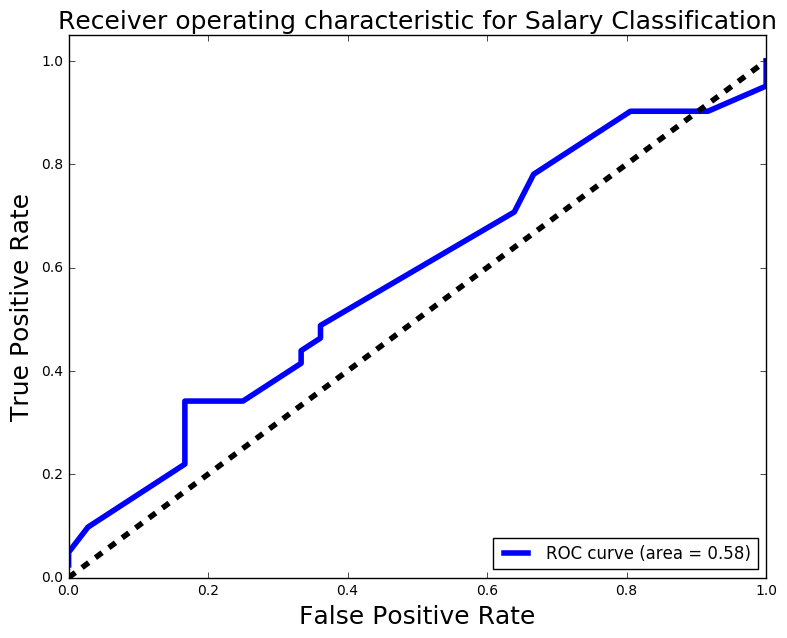

In [49]:
#Roc
Y_score = logreg.decision_function(X_test)

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(Y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 ("High Salary")
plt.figure(figsize=[9,7])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for Salary Classification', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [55]:
# DL. I think this goes after you L1 and L2 regularization.
scores = cross_val_score(model_l1, X_train,Y_train)
print scores

[ 0.62264151  0.55769231  0.58823529]


In [56]:
# DL. I think this goes after you L1 and L2 regularization.
scores2 = cross_val_score(model_l2, X_train,Y_train)
print scores

[ 0.62264151  0.55769231  0.58823529]


### Compare L1 and L2 regularization for this logistic regression model. What effect does this have on the coefficients learned?

In [52]:
model_l1 = LogisticRegression(penalty = 'l1', C=1)
model_l1.fit(X_train,Y_train)
score = cross_val_score
Y_pred = model_l1.predict(X_test)
ypro = model_l1.predict_proba(X_test)
Y_scorel1 = model_l1.decision_function(X_test)
acc = accuracy_score(Y_test, Y_pred)
print(acc)
cls_rep = classification_report(Y_test, Y_pred)
print(cls_rep)

0.558441558442
             precision    recall  f1-score   support

          0       0.52      0.67      0.59        36
          1       0.61      0.46      0.53        41

avg / total       0.57      0.56      0.55        77



In [53]:
model_l2 = LogisticRegression(penalty = 'l2', C =1)
model_l2.fit(X_train,Y_train)
score = cross_val_score
Y_pred = model_l2.predict(X_test)
ypro = model_l2.predict_proba(X_test)

acc = accuracy_score(Y_test, Y_pred)
print(acc)
cls_rep = classification_report(Y_test, Y_pred)
print(cls_rep)
    

0.545454545455
             precision    recall  f1-score   support

          0       0.51      0.67      0.58        36
          1       0.60      0.44      0.51        41

avg / total       0.56      0.55      0.54        77



# Conclusions

In [54]:
# DL. Can you explain this a little bit more.
# I dont see much differen

1. I'd like to take into account that the data is skewed due to the fact that the markets aren't equal.

#### Optional: Continue to incorporate other text features from the title or summary that you believe will predict the salary and examine their coefficients. Take ~100 scraped entries with salaries. Convert them to use with your model and predict the salary. Which entries have the highest predicted salaries?

# Bonus Section: Use Count Vectorizer from scikit-learn to create features from the text summaries. 
- Examine using count or binary features in the model
- Re-evaluate the logistic regression model using these. Does this improve the model performance? 
- What text features are most valuable? 

In [57]:
# DL. Error
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform()

for metric in ['accuracy', 'precision', 'recall', 'roc_auc']:
    scores = cross_val_score(model, X_scaled, y, cv=3, scoring=metric)
    print(metric, scores.mean(), scores.std())

TypeError: fit_transform() takes at least 2 arguments (1 given)

In [58]:
model.fit(X_scaled, y)

df = pd.DataFrame({'features' : vectorizer.get_feature_names(), 'coef': model.coef_[0,:]})
df.sort_values('coef', ascending=False, inplace=True)

AttributeError: 'LogitResults' object has no attribute 'fit'

In [59]:
df.head()

company          location    salary  \
186                         Selby Jennings        Dallas, TX   97500.0   
2273                              Audigent  Philadelphia, PA  105000.0   
2275  Public Health Management Corporation  Philadelphia, PA   70000.0   
2287                  Wolfe & Huntsman LLC  Philadelphia, PA  155000.0   
2289                   The Big Game Hunter   Bala-Cynwyd, PA  125000.0   

                                                  title  
186             Catastrophe Risk Analyst - Quantitative  
2273                         Senior Full-Stack Engineer  
2275   Research Scientist - Research & Evaluation Group  
2287  Senior Business Systems Architect (Hadoop Deve...  
2289       Quantitative Research Analyst Bala Cynwyd PA

In [60]:
df.tail()

company          location    salary  \
8887          Boy Scouts of America  Irving, TX 75038   50000.0   
8934                 Selby Jennings        Dallas, TX  150000.0   
8941  University of Texas at Dallas    Richardson, TX   50000.0   
9030            NextStep Recruiting  Irving, TX 75063   85000.0   
9074               All-In Analytics        Dallas, TX   90000.0   

                                          title  
8887        Senior Statistical Data Coordinator  
8934  Quantitative Analyst - Multiple Vacancies  
8941                      Research Scientist II  
9030           Pricing and Quantitative Analyst  
9074            Senior Marketing Data Scientist

In [61]:
# retest L1 and L2 regularization
from sklearn.linear_model import LogisticRegressionCV

model = LogisticRegressionCV()


from IPython.display import Audio
Audio(url="../assets/yeah.mp3",autoplay=True)
# DL. LMAO!

Score: | 12/24
------|-------
Identify: Problem Statement and Hypothesis | 0
Acquire: Import Data using BeautifulSoup| 3
Parse: Clean and Organize Data| 3
Model: Perform Logistic Regression| 2 
Evaluate: Logistic Regression Results	| 1
Present: Blog Report with Findings and Recommendations		| 0
Interactive Tableau visualizations | 0
Regularization |2
Bonus: Countvectorizer  |1 

In [62]:
# DL. I think you did an amazing job collecting and parsing the data. 
# You need to spend a little more time with the models. 
# You're on to a nice start but your results should be interpretable.
# Take some time to explain what you're doing as you do so your code is easier to follow.
# I also think that your AUC score could be better
# We can work on it together during office hours if you'd like!